# 베스트 모델 만들기 - 와인 사례
## 이진 분류
## 베스트 모델 업데이트하기 - 자동 중단, 그래프로 확인

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 입력
df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [8]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [9]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.37780, saving model to ./model/final001-0.3778.hdf5

Epoch 00002: val_loss improved from 0.37780 to 0.29494, saving model to ./model/final002-0.2949.hdf5

Epoch 00003: val_loss improved from 0.29494 to 0.27814, saving model to ./model/final003-0.2781.hdf5

Epoch 00004: val_loss improved from 0.27814 to 0.26247, saving model to ./model/final004-0.2625.hdf5

Epoch 00005: val_loss improved from 0.26247 to 0.25282, saving model to ./model/final005-0.2528.hdf5

Epoch 00006: val_loss improved from 0.25282 to 0.24013, saving model to ./model/final006-0.2401.hdf5

Epoch 00007: val_loss improved from 0.24013 to 0.23370, saving model to ./model/final007-0.2337.hdf5

Epoch 00008: val_loss improved from 0.23370 to 0.22727, saving model to ./model/final008-0.2273.hdf5

Epoch 00009: val_loss improved from 0.22727 to 0.21986, saving model to ./model/final009-0.2199.hdf5

Epoch 00010: val_loss improved from 0.21986 to 0.21408, saving model to ./model/final


Epoch 00099: val_loss improved from 0.10246 to 0.10188, saving model to ./model/final099-0.1019.hdf5

Epoch 00100: val_loss did not improve from 0.10188

Epoch 00101: val_loss did not improve from 0.10188

Epoch 00102: val_loss improved from 0.10188 to 0.10024, saving model to ./model/final102-0.1002.hdf5

Epoch 00103: val_loss did not improve from 0.10024

Epoch 00104: val_loss improved from 0.10024 to 0.10001, saving model to ./model/final104-0.1000.hdf5

Epoch 00105: val_loss improved from 0.10001 to 0.09822, saving model to ./model/final105-0.0982.hdf5

Epoch 00106: val_loss did not improve from 0.09822

Epoch 00107: val_loss did not improve from 0.09822

Epoch 00108: val_loss did not improve from 0.09822

Epoch 00109: val_loss did not improve from 0.09822

Epoch 00110: val_loss improved from 0.09822 to 0.09746, saving model to ./model/final110-0.0975.hdf5

Epoch 00111: val_loss improved from 0.09746 to 0.09677, saving model to ./model/final111-0.0968.hdf5

Epoch 00112: val_loss i

Epoch 00208: val_loss did not improve from 0.06314

Epoch 00209: val_loss improved from 0.06314 to 0.06294, saving model to ./model/final209-0.0629.hdf5

Epoch 00210: val_loss did not improve from 0.06294

Epoch 00211: val_loss improved from 0.06294 to 0.06222, saving model to ./model/final211-0.0622.hdf5

Epoch 00212: val_loss did not improve from 0.06222

Epoch 00213: val_loss did not improve from 0.06222

Epoch 00214: val_loss did not improve from 0.06222

Epoch 00215: val_loss did not improve from 0.06222

Epoch 00216: val_loss did not improve from 0.06222

Epoch 00217: val_loss improved from 0.06222 to 0.06155, saving model to ./model/final217-0.0615.hdf5

Epoch 00218: val_loss did not improve from 0.06155

Epoch 00219: val_loss did not improve from 0.06155

Epoch 00220: val_loss did not improve from 0.06155

Epoch 00221: val_loss did not improve from 0.06155

Epoch 00222: val_loss did not improve from 0.06155

Epoch 00223: val_loss did not improve from 0.06155

Epoch 00224: val_l


Epoch 00348: val_loss did not improve from 0.05507

Epoch 00349: val_loss did not improve from 0.05507

Epoch 00350: val_loss did not improve from 0.05507

Epoch 00351: val_loss did not improve from 0.05507

Epoch 00352: val_loss did not improve from 0.05507

Epoch 00353: val_loss did not improve from 0.05507

Epoch 00354: val_loss did not improve from 0.05507

Epoch 00355: val_loss improved from 0.05507 to 0.05458, saving model to ./model/final355-0.0546.hdf5

Epoch 00356: val_loss did not improve from 0.05458

Epoch 00357: val_loss did not improve from 0.05458

Epoch 00358: val_loss did not improve from 0.05458

Epoch 00359: val_loss did not improve from 0.05458

Epoch 00360: val_loss did not improve from 0.05458

Epoch 00361: val_loss did not improve from 0.05458

Epoch 00362: val_loss did not improve from 0.05458

Epoch 00363: val_loss did not improve from 0.05458

Epoch 00364: val_loss did not improve from 0.05458

Epoch 00365: val_loss did not improve from 0.05458

Epoch 00366: 

Epoch 00497: val_loss did not improve from 0.05198

Epoch 00498: val_loss did not improve from 0.05198

Epoch 00499: val_loss did not improve from 0.05198

Epoch 00500: val_loss did not improve from 0.05198

Epoch 00501: val_loss did not improve from 0.05198

Epoch 00502: val_loss did not improve from 0.05198

Epoch 00503: val_loss did not improve from 0.05198

Epoch 00504: val_loss did not improve from 0.05198

Epoch 00505: val_loss did not improve from 0.05198

Epoch 00506: val_loss did not improve from 0.05198

Epoch 00507: val_loss did not improve from 0.05198

Epoch 00508: val_loss did not improve from 0.05198

Epoch 00509: val_loss did not improve from 0.05198

Epoch 00510: val_loss did not improve from 0.05198

Epoch 00511: val_loss did not improve from 0.05198

Epoch 00512: val_loss did not improve from 0.05198

Epoch 00513: val_loss did not improve from 0.05198

Epoch 00514: val_loss did not improve from 0.05198

Epoch 00515: val_loss did not improve from 0.05198

Epoch 00516:


Epoch 00650: val_loss did not improve from 0.05042

Epoch 00651: val_loss did not improve from 0.05042

Epoch 00652: val_loss did not improve from 0.05042

Epoch 00653: val_loss did not improve from 0.05042

Epoch 00654: val_loss did not improve from 0.05042

Epoch 00655: val_loss did not improve from 0.05042

Epoch 00656: val_loss did not improve from 0.05042

Epoch 00657: val_loss did not improve from 0.05042

Epoch 00658: val_loss did not improve from 0.05042

Epoch 00659: val_loss did not improve from 0.05042

Epoch 00660: val_loss did not improve from 0.05042

Epoch 00661: val_loss did not improve from 0.05042

Epoch 00662: val_loss did not improve from 0.05042

Epoch 00663: val_loss improved from 0.05042 to 0.05031, saving model to ./model/final663-0.0503.hdf5

Epoch 00664: val_loss improved from 0.05031 to 0.05025, saving model to ./model/final664-0.0502.hdf5

Epoch 00665: val_loss did not improve from 0.05025

Epoch 00666: val_loss did not improve from 0.05025

Epoch 00667: va

Epoch 00801: val_loss did not improve from 0.04927

Epoch 00802: val_loss did not improve from 0.04927

Epoch 00803: val_loss did not improve from 0.04927

Epoch 00804: val_loss did not improve from 0.04927

Epoch 00805: val_loss did not improve from 0.04927

Epoch 00806: val_loss did not improve from 0.04927

Epoch 00807: val_loss did not improve from 0.04927

Epoch 00808: val_loss improved from 0.04927 to 0.04913, saving model to ./model/final808-0.0491.hdf5

Epoch 00809: val_loss did not improve from 0.04913

Epoch 00810: val_loss did not improve from 0.04913

Epoch 00811: val_loss did not improve from 0.04913

Epoch 00812: val_loss did not improve from 0.04913

Epoch 00813: val_loss did not improve from 0.04913

Epoch 00814: val_loss did not improve from 0.04913

Epoch 00815: val_loss did not improve from 0.04913

Epoch 00816: val_loss did not improve from 0.04913

Epoch 00817: val_loss did not improve from 0.04913

Epoch 00818: val_loss did not improve from 0.04913

Epoch 00819: v

In [11]:
del model
model = load_model('model/final846-0.0485.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=0)[1]))


 Accuracy: 0.9886


In [12]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

In [13]:
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

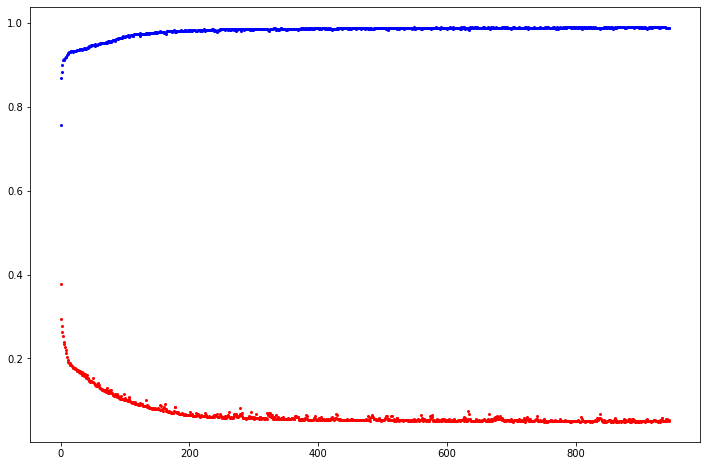

In [14]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()